In [1]:
import os
import re
import shutil
import sys
from datetime import date

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import measure

# local imports
from image_arrays import *
from s2p_packer import unpack_hdf
import preprocess as pp

### Activate interactive plotting
By default, inline plots are static. Here we specify one of two options (comment out the undesired command) that will open plots with GUI controls for us.
- **qt ->** figures opened in windows outside the notebook
- **notebook ->** figures within notebook underneath generating cell.

In [2]:
# %matplotlib qt 
%matplotlib notebook

In [3]:
base_path = "/mnt/Data/prerna_noise/"
# orig_path = base_path + "2021_02_05/"
# orig_path = base_path + "2021_03_11/"
# orig_path = base_path + "2021_04_09/"
# orig_path = base_path + "2021_04_20/"
# orig_path = base_path + "2021_12_14/"
# orig_path = base_path + "2022_04_27_5f/"
# orig_path = base_path + "2022_04_27_32bit_5f/"
# orig_path = base_path + "2021_04_20_scan2/"
# orig_path = base_path + "2022_05_31"
orig_path = base_path + "2022_07_28"
# processed_path = orig_path[:-1] + "_processed_4x4/scan4b/"
processed_path = orig_path + "_processed_4x4/"

In [4]:
pp.process_folders(
    orig_path,
    processed_path,
    lambda a: pp.crop_sides(a, 16, 0),
    lambda a: measure.block_reduce(a, (1, 4, 4), np.mean, 0),
#     lambda a: measure.block_reduce(a, (1, 1, 4, 4), np.mean, 0),
#     lambda a: measure.block_reduce(a, (1, 1, 2, 2), np.mean, 0),
#     lambda a: pp.qi_threshold(a, .4),
    multi_trial=False,
    h5_out=True,
)

In [5]:
depth = "DD"
noise_size = "400um"
processed_tiff_path = os.path.join(processed_path, depth, noise_size)

processed = np.stack(
    [
        io.imread(os.path.join(processed_tiff_path, f))
        for f in os.listdir(processed_tiff_path) 
        if (f.endswith(".tiff") or f.endswith(".tif"))
    ],
    axis=0
)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/Data/prerna_noise/2022_05_3_processed_4x4/DD/400um'

<IPython.core.display.Javascript object>


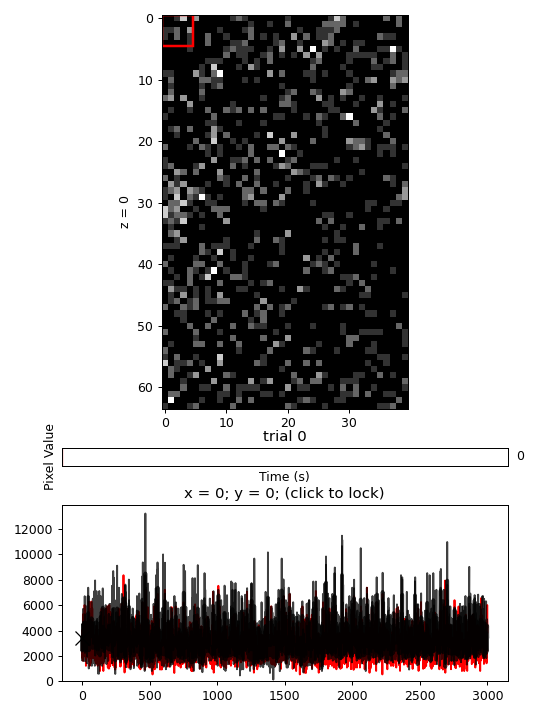

Recording shape: (3000, 64, 40)


In [35]:
processed_stacks_plot = StackExplorer(
    processed,
#     zaxis=recs_xaxis,
    delta=1,
    roi_sz=5,
    vmin=0,
    figsize=(6, 8)
)
processed_stacks_plot.ax[1].set_xlabel("Time (s)")
processed_stacks_plot.ax[1].set_ylabel("Pixel Value")

print("Recording shape:", processed[0].shape)
processed_stacks_plot.fig.show()

In [7]:
orig_path = "/mnt/Data/prerna_velocity/2021_09_29/"
processed_path = orig_path[:-1] + "_processed_4x4/"

In [8]:
pp.process_folders(
    orig_path,
    processed_path,
#     lambda a: pp.crop_sides(a, 48, 0),
    lambda a: measure.block_reduce(a, (1, 1, 4, 4), np.mean, 0),
#     lambda a: measure.block_reduce(a, (1, 1, 2, 2), np.mean, 0),
#     lambda a: pp.qi_threshold(a, .4),
)